# Рынок заведений общественного питания Москвы

## Описание проекта

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Нужно подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

### План работы

<a href='#download_prep'> 1. Загрузка данных и подготовка их к анализу</a>

 * загрузить данные в переменные, ознакомиться с ними.
 * оптимизировать данные для анализа.
 * убедиться, что тип данных в каждой колонке — правильный, при необходимости - заменить.
 
2. Анализ данных

    <a href='#ratio_of_object_types_by_number'>* Соотношение видов объектов общественного питания по количеству. График.</a>

    <a href='#ratio_of_net'>* Соотношение сетевых и несетевых заведений по количеству. График.</a>

    <a href='#charact_net'>* Для какого вида объекта общественного питания характерно сетевое распространение?</a>

    <a href='#number_of_seats'>* Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a>

    <a href='#mean_number_of_seats'>* Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Графики.</a>

    <a href='#streets'>* Выделить в отдельный столбец информацию об улице из столбца address.</a>

    <a href='#streets_top_10'>* Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?</a>

    <a href='#streets_one_object'>* Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?</a>

    <a href='#distribution_of_seats'>* Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?</a>

    <a href='#conclusion'>* Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.</a>
    
<a href='#presentation'>3. Подготовка презентации для инвесторов.</a>

### <a id='download_prep'></a>1. Загрузка данных и подготовка их к анализу###

In [1]:
import pandas as pd #импортируем библиотеки
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
import requests
import re
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
#прочитаем первый файл, присвоим таблице имя
restaurants = pd.read_csv('/datasets/rest_data.csv')
restaurants.to_csv('m_streets.csv')

In [3]:
restaurants.info() #посмотрим общую информацию о таблице
restaurants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Таблица содержит столбцы:  
* object_name — название объекта общественного питания;  
* chain — сетевой ресторан;  
* object_type — тип объекта общественного питания;  
* address — адрес;  
* number — количество посадочных мест.  

Пропусков в данных нет. Данные соответствуют ожидаемым типам (int64, object).

## Анализ данных

#### <a id='ratio_of_object_types_by_number'></a>***Соотношение видов объектов общественного питания по количеству. График***

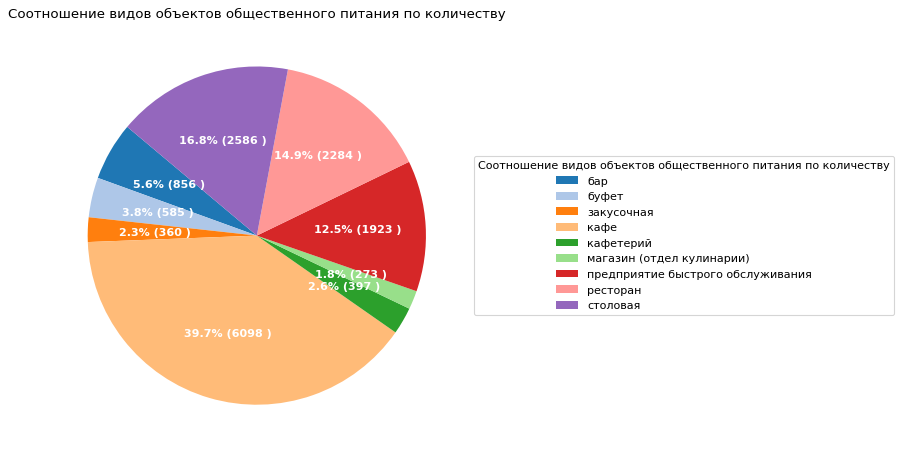

In [4]:
#сгруппируем заведения по типу с подсчетом количества в каждом типе
type_count = restaurants.groupby('object_type').size().reset_index(name='counts')

#задаем параметры круговой диаграммы
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
data = type_count['counts']
categories = type_count['object_type']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20.colors,
                                 startangle=140)

#подписываем
ax.legend(wedges, categories, title="Соотношение видов объектов общественного питания по количеству",\
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Соотношение видов объектов общественного питания по количеству")
plt.show()

Для визуализации соотношения видов объектов общественного питания по количеству постороим круговую диаграмму с отображением абсолютного и относительного количества.  
По диаграмме видим, что наибольшую долю занимают кафе (39.7%), далее (по убыванию) - столовые (16.8%), рестораны (14.9%), предприятия быстрого обслуживания (12.5%), бары (5.6%), буфеты (3.8%), кафетерии (2.6%), закусочные (2.3%) и магазины - отдел кулинарии - 1.8%).

#### <a id='ratio_of_net'></a>***Соотношение сетевых и несетевых заведений по количеству. График***

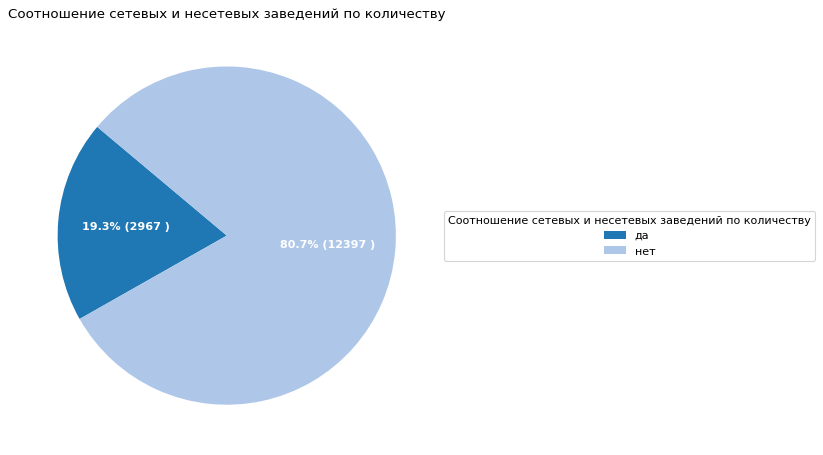

In [5]:
#сгруппируем заведения по типу с подсчетом количества в каждом типе
chain_count = restaurants.groupby('chain').size().reset_index(name='counts')

#задаем параметры круговой диаграммы
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
data = chain_count['counts']
categories = chain_count['chain']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20.colors,
                                 startangle=140)

#подписываем
ax.legend(wedges, categories, title="Соотношение сетевых и несетевых заведений по количеству",\
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Соотношение сетевых и несетевых заведений по количеству")
plt.show()

Построим круговую диаграмму с отображением абсолютного и относительного показателей для визуализации соотношения сетевых и несетевых заведений по количеству.  
Видим, что несетевые заведения преобладают (80.7%), а доля сетевых составляет 19.3%.

#### <a id='charact_net'></a>***Для какого вида объекта общественного питания характерно сетевое распространение?***

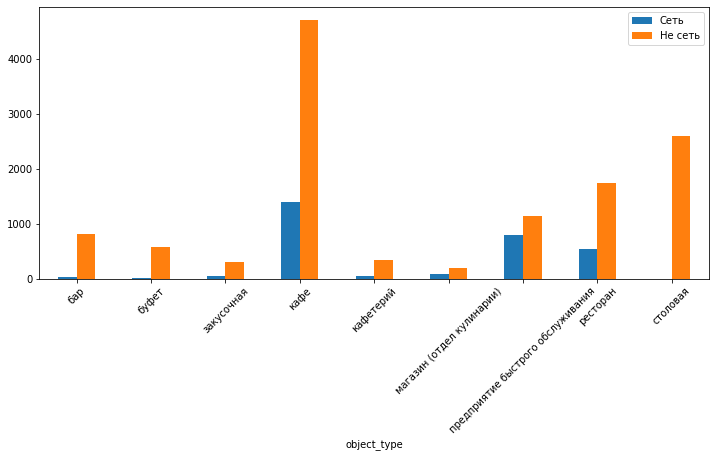

In [6]:
#сгруппируем заведения, разделяя сетевые и несетевые, построим график
type_chain_count = restaurants.groupby('object_type')['chain'].agg([
             ('Сеть', lambda x: sum(x == 'да')),
             ('Не сеть', lambda x: sum(x == 'нет'))]).plot(kind='bar', figsize=(12,5), rot = 45)

Как видим, во всех видах общественного питания преобладают несетевые заведения. Но количество сетей достаточно весомо выражено для кафе, предприятий быстрого обслуживания и ресторанов.

#### <a id='number_of_seats'></a>***Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?***

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56bbab0390>,
      dtype=object)

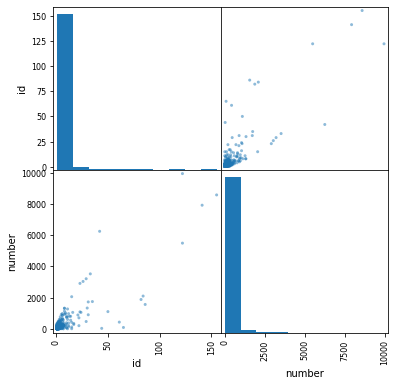

In [7]:
#делаем срез сетевых заведений
chain_y = restaurants[restaurants['chain'] == 'да']

#сгруппируем заведения по количеству заведений и посадочных мест, построим график
chain_y_places = (chain_y
                  .groupby('object_name')['number']
                  .agg({'id': 'count', 'number':'sum'})
                  .reset_index()
                 )
#построим матрицу
chain_y_places = chain_y.pivot_table(index='object_name',\
                              values=['id', 'number'], aggfunc = {'id': 'count', 'number':'sum'})
pd.plotting.scatter_matrix(chain_y_places, figsize = (6, 6))

По матрице видим, что для сетей более характерно большое количество заведений с малым количеством мест.

#### <a id='mean_number_of_seats'></a>***Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?***

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)




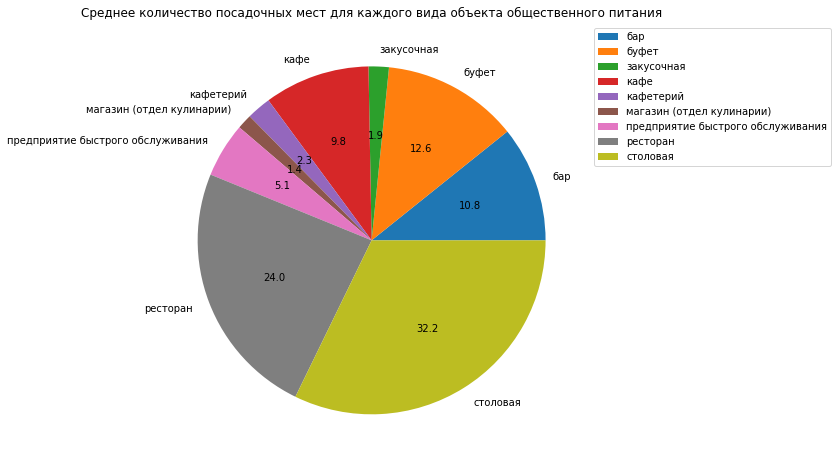

In [8]:
#сгруппируем заведения по типу и вычислим среднее количество посадочных мест
rest_seats_mean = (restaurants
                  .groupby('object_type')['number']
                  .agg({'number':'mean'})
                  .plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.1f')
                 )
#зададим параметры и подпишем график
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title("Среднее количество посадочных мест для каждого вида объекта общественного питания")
plt.ylabel("")
plt.show()

Видим, что больше всего в среднем посадочных мест (по убыванию) - в столовых (32.2), ресторанах (24), буфетах (12.6), барах (10.8), далее следуют кафе (9.8), предприятия быстрого обслуживания (5.1), кафетерии (2.3), закусочные (1.9) и магазины - отделы кулинарии - (1.4).

#### <a id='streets'></a>***Выделим в отдельный столбец информацию об улице из столбца address.***

In [9]:
# отбросим название города Москва и поселений, для которых не указан точный адрес
restaurants['street'] = restaurants['address'].str.replace('город Москва, ', '')
restaurants['street'] = restaurants['street'].str.replace('город Зеленоград, ', '')
restaurants['street'] = restaurants['street'].str.replace('поселение Сосенское, ', '')
restaurants['street'] = restaurants['street'].str.replace('поселение Московский, ', '')
restaurants['street'] = restaurants['street'].str.replace('город Московский, ', '')

# и вторую часть - после названия улицы
restaurants['street'] = restaurants['street'].apply(lambda x: ', '.join(x.split(',')[:1]))

Для выделения адреса в отдельный столбец уберем лишнюю информацию: название города (Москва), т.к все данные, которые нами рассматриваются, в широком смысле относятся к Москве, а также поселений и городов, для которых не указана улица (нет точного адреса). В реальной ситуации следует ***запросить полные данные с указанием улицы,*** иначе эти целые населенные пункты будут посчитаны как одна улица и сильно исказят результаты исследования. А в данной учебной работе придется их отбросить.  

Если бы в базе было много разных городов, то понадобилоось бы применить метод .str.split(',', expand=True), а затем, обращаясь к столбцу по индексу, объединить получившиеся датафреймы. В данном же случае, поскольку города с неполными данными отбрасываются и их немного, это удобнее и быстрее сразу делать методом .str.replace.

#### <a id='streets_top_10'></a>***График топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?***

In [10]:
#сгруппируем таблицу по столбцу с улицей в порядке убывания количества заведений, выделим топ-10
popular_streets = (restaurants
                  .groupby('street')['id']
                  .agg({'id': 'count'})
                  .reset_index()
                  .sort_values(by = 'id', ascending = False)
                  .head(10)
                  )

popular_streets

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)




,street,id
1551,проспект Мира,204
1014,Профсоюзная улица,183
693,Ленинградский проспект,173
997,Пресненская набережная,167
410,Варшавское шоссе,162
696,Ленинский проспект,148
1547,проспект Вернадского,132
684,Кутузовский проспект,114
607,Каширское шоссе,112
614,Кировоградская улица,110


Выделим топ-10 улиц по количеству заведений:
* Проспект Мира - Алексеевский район (СВАО);
* Профсоюзная улица - район Коньково (ЮЗАО);
* Ленинградский проспект - Хорошёвский район (САО);
* Пресненская набрежная - Пресненский район (ЦАО);
* Варшавское шоссе - район Чертаново Южное (ЮАО);
* Ленинский проспект - Ломоносовский район (ЮЗАО);
* Проспект Вернадского - Ломоносовский район (ЮЗАО);
* Кутузовский проспект - район Драгомирово (ЗАО);
* Каширское шоссе - район Москворечье-Сабурово (ЮАО);
* Кировоградская улица - Чертаново Центральное (ЮАО).

#### <a id='streets_one_object'></a>***Улицы с одним объектом общественного питания.***

In [11]:
#сделаем срез с улицами, на которых находится по одному объекту
single_object_streets = (restaurants
                  .groupby('street')['id']
                  .agg({'id': 'count'})
                  .reset_index()
                  .query('id == 1')
                  )
len(single_object_streets)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)




639

На 639 улицах находится по одному объекту общественного питания.

In [12]:
# создадим df с плотностью населения по районам
prospective_area = pd.DataFrame({'distinct' : ['Район Марьино', 'Район Чертаново Северное', 'Район Чертаново Южное',\
'Район Филевский Парк', 'Район Строгино', 'Обручевский район', 'Район Южное Медведково', 'Район Царицыно',\
'Молжаниновский район', 'Район Метрогородок', 'Район Москворечье-Сабурово', 'Район Марфино', 'Район Нагатино-Садовники',\
'Район Гагаринский', 'Район Левобережный', 'Район Западное Дегунино', ' Район Ивановское', 'Алтуфьевский район',\
'Район Лианозово'],
                       'population_density' : [21321.83, 21212.59, 16175.48, 9804.89, 9548.16, 14205.07, 22087.11, 15318.86,\
559.87, 1415.45, 8674.52, 11914.81, 10219.83, 14886.73, 6824.5, 11177.03, 12587.54, 17721.85, 14836.1]})
prospective_area.sort_values(by = 'population_density', ascending = False)

,distinct,population_density
6,Район Южное Медведково,22087.11
0,Район Марьино,21321.83
1,Район Чертаново Северное,21212.59
17,Алтуфьевский район,17721.85
2,Район Чертаново Южное,16175.48
7,Район Царицыно,15318.86
13,Район Гагаринский,14886.73
18,Район Лианозово,14836.10
5,Обручевский район,14205.07
16,Район Ивановское,12587.54


Воспользуемся внешней информацией о местонахождении искомых улиц в районах Москвы.   

Объединим данные с нашей таблицей и сгруппируем по улицам, на которых встречается по одному объекту общественного питания. Поскольку нас интересуют наименее освоенные в этом смысле районы, сгруппируем их по возрастанию количества улиц, возьмем те, где на весь район улица с одним объектом общественного питания только одна.   

Для каждого из районов укажем плотность населения (чел/кв.м), отсортируем по убыванию плотности. Получим таблицу.  

Таким образом, мы имеем список районов, в которых при достаточно высокой плотности населения (первые позиции списка) находится мало объектов общественного питания. Это позволяет предположить такие районы наиболее перспективными с точки зрения открытия новых заведений.   

Среди них как приоритетные можно выделить три (с плотностью населения свыше 20 тыс.чел/кв.м): Южное Медведково, Марьино, Чертаново Северное.

#### <a id='distribution_of_seats'></a>***Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания***

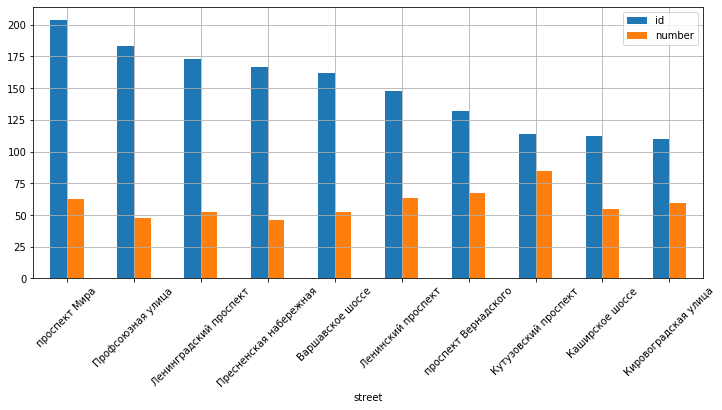

In [13]:
# сгруппируем  улицы с большим количеством объектов общественного питания (топ-10) и среднее количество мест
plenty_object_streets = (restaurants
       .groupby(['street'])
       .agg({'id': 'count', 'number': 'mean'})
       .reset_index(level = 'street')
       .sort_values(by = 'id', ascending = False)
       .head(10)
)

plenty_object_streets.plot(kind='bar', figsize=(12,5), rot = 45, x = 'street', grid = True)

### <a id='conclusion'></a>Общий вывод

Из проведенного исследования можно сделать следующие выводы.  

Наибольшие доли по соотношению заведений общественного питания занимают кафе, столовые и рестораны. При этом преобладают несетевые заведения. Для несетей больше характерно малое количество заведений с большим количеством мест. По количеству мест лидируют столовые, рестораны, буфеты, бары, кафе и др.  

Поэтому представляется целесообразным открывать столовую либо кафе несетевой направленности с большим количеством посадочных мест (от 50 и выше).  

При этом приоритетными для открытия заведения являются густонаселенные районы среди тех, где расположено малое количество объектов общественного питания (Южное Медведково, Марьино, Чертаново Северное). 

### <a id='presentation'></a>Презентация

https://yadi.sk/i/6PXDeEqK7EIO-g